In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler, MinMaxScaler, KBinsDiscretizer, PolynomialFeatures

import hvplot.pandas
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

import seaborn as sns
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_df = pd.read_csv("Resources/tracks.csv")
data_df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [4]:
data_df['release_date'] = pd.to_datetime(data_df['release_date'])
data_df

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922-01-01,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


In [7]:
data_df['poprange'] = KBinsDiscretizer(encode='ordinal', strategy = 'uniform').fit_transform(data_df['popularity'].values.reshape(-1,1))
data_df

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,poprange
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3,0.0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,...,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1,0.0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,...,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5,0.0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,...,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3,0.0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922-01-01,0.402,0.1580,...,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,...,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4,2.0
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,...,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4,3.0
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,...,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4,3.0
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,...,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4,2.0


In [30]:
data_df['poprange'].count()

586672

In [8]:
data_df['poprange'].value_counts()

1.0    219152
0.0    209890
2.0    129786
3.0     26890
4.0       954
Name: poprange, dtype: int64

In [9]:
data_df.dtypes

id                          object
name                        object
popularity                   int64
duration_ms                  int64
explicit                     int64
artists                     object
id_artists                  object
release_date        datetime64[ns]
danceability               float64
energy                     float64
key                          int64
loudness                   float64
mode                         int64
speechiness                float64
acousticness               float64
instrumentalness           float64
liveness                   float64
valence                    float64
tempo                      float64
time_signature               int64
poprange                   float64
dtype: object

In [10]:
data_df.drop(['popularity'],axis =1)

,id,name,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,poprange
0,35iwgR4jXetI318WEWsa1Q,Carve,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3,0.0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1,0.0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5,0.0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3,0.0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922-01-01,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4,2.0
586668,0NuWgxEp51CutD2pJoF4OM,blind,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4,3.0
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4,3.0
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4,2.0


In [11]:
features = data_df.drop(['popularity','poprange','id','name','artists','id_artists','release_date'],axis =1)
poly = PolynomialFeatures(include_bias = False)
poly_features = poly.fit_transform(features)
poly_features_df = pd.DataFrame(poly_features, columns = poly.get_feature_names_out(features.columns))
poly_features_df

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,liveness^2,liveness valence,liveness tempo,liveness time_signature,valence^2,valence tempo,valence time_signature,tempo^2,tempo time_signature,time_signature^2
0,126903.0,0.0,0.645,0.4450,0.0,-13.338,1.0,0.4510,0.674,0.744000,...,0.022801,0.019177,15.832501,0.4530,0.016129,13.316077,0.3810,10993.732201,314.553,9.0
1,98200.0,0.0,0.695,0.2630,0.0,-22.136,1.0,0.9570,0.797,0.000000,...,0.021904,0.096940,15.097332,0.1480,0.429025,66.815895,0.6550,10405.836081,102.009,1.0
2,181640.0,0.0,0.434,0.1770,1.0,-21.180,1.0,0.0512,0.994,0.021800,...,0.044944,0.096884,27.648616,1.0600,0.208849,59.601026,2.2850,17008.854724,652.090,25.0
3,176907.0,0.0,0.321,0.0946,7.0,-27.961,1.0,0.0504,0.995,0.918000,...,0.010816,0.041288,17.677920,0.3120,0.157609,67.482060,1.1910,28893.200400,509.940,9.0
4,163080.0,0.0,0.402,0.1580,3.0,-16.900,0.0,0.0390,0.989,0.130000,...,0.096721,0.060956,32.101420,1.2440,0.038416,20.231120,0.7840,10654.368400,412.880,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,258267.0,0.0,0.560,0.5180,0.0,-7.471,0.0,0.0292,0.785,0.000000,...,0.004199,0.013673,8.546861,0.2592,0.044521,27.830056,0.8440,17396.554816,527.584,16.0
586668,153293.0,0.0,0.765,0.6630,0.0,-5.223,1.0,0.0652,0.141,0.000297,...,0.008538,0.063386,13.868408,0.3696,0.470596,102.962426,2.7440,22527.308281,600.364,16.0
586669,187601.0,0.0,0.535,0.3140,7.0,-12.823,0.0,0.0408,0.895,0.000150,...,0.007639,0.005795,12.681303,0.3496,0.004396,9.619798,0.2652,21052.559025,580.380,16.0
586670,142003.0,0.0,0.696,0.6150,10.0,-6.212,1.0,0.0345,0.206,0.000003,...,0.093025,0.133590,27.458845,1.2200,0.191844,39.432702,1.7520,8105.220841,360.116,16.0


In [29]:
poly_features_df.count()

duration_ms               586672
explicit                  586672
danceability              586672
energy                    586672
key                       586672
                           ...  
valence tempo             586672
valence time_signature    586672
tempo^2                   586672
tempo time_signature      586672
time_signature^2          586672
Length: 119, dtype: int64

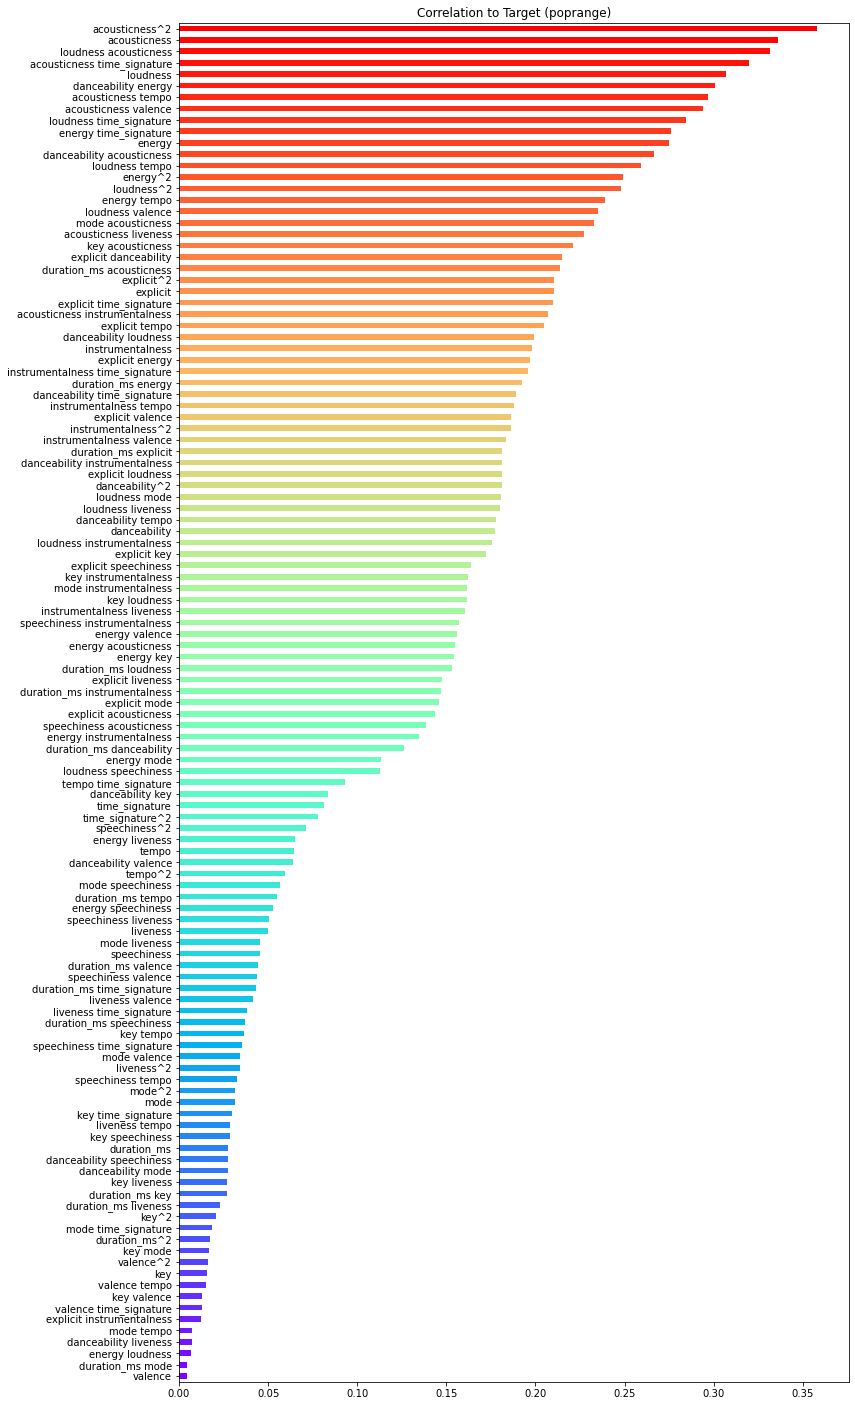



 valence                        0.004282
duration_ms mode               0.004705
energy loudness                0.006898
danceability liveness          0.007301
mode tempo                     0.007351
                                 ...   
loudness                       0.306951
acousticness time_signature    0.319974
loudness acousticness          0.331371
acousticness                   0.335873
acousticness^2                 0.357799
Length: 119, dtype: float64


In [12]:
n_fts = len(poly_features_df.columns)
colors = cm.rainbow(np.linspace(0, 1, n_fts))

poly_features_df.corrwith(data_df.poprange).abs().sort_values(ascending=True).plot(kind='barh', 
                                                                                     color=colors, figsize=(12, 25))
plt.title('Correlation to Target (poprange)')
plt.show()

print('\n\n',poly_features_df.corrwith(data_df.poprange).abs().sort_values(ascending=True))

In [35]:
corr_df = poly_features_df.corrwith(data_df.poprange).abs().sort_values(ascending=True)
corr_df_filt = corr_df[corr_df > 0.1]

In [40]:
feature_names = corr_df_filt.index

multiclass classification sk learn
mlextend: sequential feature selection 

# Logistic Regression

In [41]:
y = data_df["poprange"]
X = poly_features_df[feature_names]

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=1, stratify=y)

In [43]:
scaler = StandardScaler()

X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [46]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='newton-cg', random_state=1, n_jobs = -1,verbose = 5)
classifier

LogisticRegression(n_jobs=-1, random_state=1, solver='newton-cg', verbose=5)

In [47]:
classifier.fit(X_train_scaled, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed: 56.3min finished


LogisticRegression(n_jobs=-1, random_state=1, solver='newton-cg', verbose=5)

In [28]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

/Users/slimykid/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Training Data Score: 0.3577626567031209


/Users/slimykid/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Testing Data Score: 0.3577672021163444


kfold cross validation verbose 5

svm random forest, SequentialFeatureSelector 

sv, rbf support vector machine